# To use this notebook, have data of the following form in a CSV file
![data format example](Ben_CSV_example.jpg)


# Contents

#### 1. Prepare for analysis (import packages and set working directory)
#### 2. Read in, tidy, and explore the data
#### 3. Generate speed trace
#### 4. Generate OffFood/OnFood comparison bar plots (including BSR)
#### 5. Generate phenotype heatmap

# 1 - Prepare for analysis

## 1.1 - Import required packages

In [1]:
import os  # <- package used to work with system filepaths
import pandas as pd  # <- package used to import and organize data
import numpy as np  # <- package used to import and organize data
import math
import seaborn as sns  # <- package used to plot graphs
from matplotlib import pyplot as plt  # <- another package used to plot graphs
from itertools import cycle  # <- package used to iterate down rows
from ipywidgets import widgets  # <- widget tool to generate button
from IPython.display import display  # <- displays button
from tkinter import Tk, filedialog  # <- Tkinter is a GUI package
from tqdm.notebook import tqdm
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
import sklearn
pd.set_option('display.max_columns', 50)
print("done step 1")

C:\Users\chris\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


done step 1


## 1.2 - Set working directory to where the CSV file with experiment data is

In [2]:
os.getcwd()
os.chdir('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data')

# 2 - Read in, tidy, and explore the data

## 2.1 - Read in the data, check its size and format

In [3]:
df1 = pd.read_csv('baseline_output_02Oct2023.csv')
df2 = pd.read_csv('baseline_output_09Oct2023.csv')
df3 = pd.read_csv('baseline_output_23Oct2023.csv')
df4 = pd.read_csv('baseline_output_13Nov2023.csv')
df5 = pd.read_csv('baseline_output_28Nov2023.csv')
df6 = pd.read_csv('baseline_output_06Jan2024.csv')
df7 = pd.read_csv('baseline_output_14Jan2024.csv')
df8 = pd.read_csv('baseline_output_22Jan2024.csv')
df9 = pd.read_csv('baseline_output_29Jan2024.csv')
df10 = pd.read_csv('baseline_output_08Feb2024.csv')
df11 = pd.read_csv('baseline_output_23May2024.csv')

# List of DataFrames to append
dfs_to_append = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

# Concatenate the DataFrames
TotalConcatenated = pd.concat(dfs_to_append, ignore_index=True)

# TotalConcatenated = pd.read_csv('baseline_output.csv')

print(TotalConcatenated.shape)
print(TotalConcatenated.head())
print(TotalConcatenated.tail())

(5556732, 20)
   Unnamed: 0  time_bin  worm      time     speed          x          y  \
0           0       4.0   381  3.875333  0.199433  27.866700  31.581700   
1           1       4.0   424  3.959000  0.215800  29.280800  33.929100   
2           2       4.0  1230  3.646400  0.282660  23.147860  26.087340   
3           3       4.0  1298  3.526000  0.365729  18.305986  23.741629   
4           4       5.0   309  4.903500  0.265500  27.393750  29.994300   

   angularspeed  pathlength       kink  bias      curve  dir      crab  \
0      5.233333    0.030333  34.000000   1.0  39.433333  0.0  0.015700   
1      3.900000    0.017000  46.300000   1.0  35.300000  0.0  0.042900   
2     10.040000    0.097600  34.520000   1.0  30.720000  0.0  0.036280   
3     17.428571    0.170429  36.857143   1.0  34.785714  0.0  0.032114   
4     22.950000    0.035500  15.250000   1.0  28.300000  0.0  0.025750   

    length   midline     width  morphwidth      area   Strain  
0  0.87930  0.977933  0.16

## 2.2 - Get list of strains in the data set

In [4]:
TotalConcatenated_strains = TotalConcatenated.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)
TotalConcatenated_strains = TotalConcatenated_strains.dropna()
TotalConcatenated_strains = TotalConcatenated_strains.Genotype.unique()

# print(TotalConcatenated_strains.head())
# print(TotalConcatenated_strains.tail())

print(TotalConcatenated_strains)

all_strains = pd.DataFrame(TotalConcatenated_strains, columns = ['Genotype'])
print(all_strains)

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\2338513971.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)


['N2' 'cat-2(e1112)' 'catp-7(tm4438)' 'catp-7(tm8556)' 'cpr-4(ok3413)'
 'cpr-5(ok2344)' 'cpr-6(tm12210)' 'cpr-8(ok2956)' 'djr-1.1(tm918)'
 'djr-1.2(tm817)' 'djr-1.2(tm951)' 'exp-2(sa26ad1426)' 'kvs-5(tm6152)'
 'lfe-2(sy326)' 'mbr-1(qa5901)' 'mbr-1(tm1235)' 'ncs-4(tm4409)'
 'ncs-7(tm4648)' 'ncs-7(tm5037)' 'rme-8(b1023)' 'sipa-1(tm11702)']
             Genotype
0                  N2
1        cat-2(e1112)
2      catp-7(tm4438)
3      catp-7(tm8556)
4       cpr-4(ok3413)
5       cpr-5(ok2344)
6      cpr-6(tm12210)
7       cpr-8(ok2956)
8      djr-1.1(tm918)
9      djr-1.2(tm817)
10     djr-1.2(tm951)
11  exp-2(sa26ad1426)
12      kvs-5(tm6152)
13       lfe-2(sy326)
14      mbr-1(qa5901)
15      mbr-1(tm1235)
16      ncs-4(tm4409)
17      ncs-7(tm4648)
18      ncs-7(tm5037)
19       rme-8(b1023)
20    sipa-1(tm11702)


## 2.3 - Determine the range for which you want to analyze data

In [5]:
start = 100  # <----- set the start time of the range
point = 400  # <----- set the end time of your range

TotalConcatenated_chunked0 = TotalConcatenated[TotalConcatenated["time"] >= start]
TotalConcatenated_chunked = TotalConcatenated_chunked0[TotalConcatenated_chunked0["time"] <= point]
print(TotalConcatenated_chunked.head())

       Unnamed: 0  time_bin  worm        time     speed          x          y  \
24560       24560     101.0     5  100.486917  0.045883  24.611192  25.134608   
24561       24561     101.0     9  100.486917  0.066300  16.949775  35.667133   
24562       24562     101.0    10  100.486917  0.048625  38.198275  33.481442   
24563       24563     101.0    11  100.486917  0.051950  15.785642  42.590175   
24564       24564     101.0    13  100.486917  0.051442  28.184600  44.454567   

       angularspeed  pathlength       kink  bias      curve  dir      crab  \
24560      2.416667    0.325083  56.950000   1.0  26.683333  0.0  0.006967   
24561     10.208333    3.951167  98.658333   1.0  36.050000  0.0  0.011908   
24562      1.175000    2.136917  32.741667   1.0  29.183333  0.0  0.004075   
24563      1.991667    4.072417  26.358333   1.0  23.166667  0.0  0.003783   
24564      2.991667    6.262167  84.608333   1.0  33.025000  0.0  0.003767   

         length   midline     width  morphwi

## 2.4 - Find average measures for each worm (across duration of specified range), split 'Strain' column into two

Ex: 'N2_OnFood' becomes 'N2' & 'OnFood'

In [6]:
TotalConcatenated_mean = TotalConcatenated_chunked.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_mean[['Genotype', 'Treatment']] = TotalConcatenated_mean['Strain'].str.split('_', expand = True)
TotalConcatenated_mean[['Gene','Allele']]=TotalConcatenated_mean['Genotype'].str.split('(',expand=True)
TotalConcatenated_mean['Allele']=TotalConcatenated_mean['Allele'].str[:-1]
print(TotalConcatenated_mean.groupby(['Gene'], as_index = False).mean())
# # TotalConcatenated_mean['Gene']=TotalConcatenated['Gene'].fill_na('N2')
print(TotalConcatenated_mean)
print(TotalConcatenated_mean.Gene.unique())

# SELECT ONLY NECESSARY COLUMNS
# TotalConcatenated_worm_avg_speed = TotalConcatenated_mean[['Gene','Genotype', 'Treatment', 'Strain', 'speed']]
TotalConcatenated_worm_avg_speed = TotalConcatenated_mean[['Gene','Genotype', 'Treatment', 'Strain', 'speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']]
print(TotalConcatenated_worm_avg_speed)
By_gene_avg_speed=TotalConcatenated_mean[['Gene','Treatment', 'speed']]

       Gene        worm    Unnamed: 0    time_bin        time     speed  \
0        N2  936.606757  48721.142559  246.330966  245.831211  0.153404   
1     cat-2  838.031022  37444.755824  252.608046  252.108151  0.196931   
2    catp-7  446.383384  36487.030634  238.817391  238.316227  0.130829   
3     cpr-4  505.576691  32772.271900  250.781567  250.281056  0.097921   
4     cpr-5  648.010762  41184.102798  249.323234  248.822987  0.111420   
5     cpr-6  546.285425  38162.472596  230.464238  229.961803  0.141625   
6     cpr-8  114.158076  12476.412927  247.620362  247.120571  0.073973   
7   djr-1.1  423.069109  33424.036227  238.365717  237.866602  0.117019   
8   djr-1.2  694.517155  53702.429113  236.097661  235.596931  0.132476   
9     exp-2  536.882197  39598.443485  236.802466  236.302000  0.119395   
10    kvs-5  410.664158  36997.232086  227.830668  227.328094  0.101076   
11    lfe-2  644.827873  51472.674219  232.688205  232.187628  0.123544   
12    mbr-1  368.227606  

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\113953120.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(TotalConcatenated_mean.groupby(['Gene'], as_index = False).mean())


## 2.5 - Find average speed measures for each genotype and treatment (across duration of specified range)

In [7]:
TotalConcatenated_avg_speed = TotalConcatenated_worm_avg_speed.groupby(['Gene','Strain', 'Treatment', 'Genotype'], as_index = False).mean()
print(TotalConcatenated_avg_speed)
# print(TotalConcatenated_avg_speed['speed'][1])

ByGene_avg_speed = By_gene_avg_speed.groupby(['Gene','Treatment'], as_index = False).mean()
print(ByGene_avg_speed)

       Gene                    Strain Treatment           Genotype     speed  \
0        N2                   N2_Food      Food                 N2  0.115222   
1        N2                 N2_NoFood    NoFood                 N2  0.184884   
2     cat-2         cat-2(e1112)_Food      Food       cat-2(e1112)  0.192579   
3     cat-2       cat-2(e1112)_NoFood    NoFood       cat-2(e1112)  0.202462   
4    catp-7       catp-7(tm4438)_Food      Food     catp-7(tm4438)  0.059566   
5    catp-7     catp-7(tm4438)_NoFood    NoFood     catp-7(tm4438)  0.169173   
6    catp-7       catp-7(tm8556)_Food      Food     catp-7(tm8556)  0.066759   
7    catp-7     catp-7(tm8556)_NoFood    NoFood     catp-7(tm8556)  0.155092   
8     cpr-4        cpr-4(ok3413)_Food      Food      cpr-4(ok3413)  0.066865   
9     cpr-4      cpr-4(ok3413)_NoFood    NoFood      cpr-4(ok3413)  0.117684   
10    cpr-5        cpr-5(ok2344)_Food      Food      cpr-5(ok2344)  0.075383   
11    cpr-5      cpr-5(ok2344)_NoFood   

## 2.6 - Generate dataframe containing only data for N2 and CB1112 for use in speed trace

In [8]:
# print(TotalConcatenated_avg_speed.Allele.unique())
print(TotalConcatenated_avg_speed.Strain.unique())

['N2_Food' 'N2_NoFood' 'cat-2(e1112)_Food' 'cat-2(e1112)_NoFood'
 'catp-7(tm4438)_Food' 'catp-7(tm4438)_NoFood' 'catp-7(tm8556)_Food'
 'catp-7(tm8556)_NoFood' 'cpr-4(ok3413)_Food' 'cpr-4(ok3413)_NoFood'
 'cpr-5(ok2344)_Food' 'cpr-5(ok2344)_NoFood' 'cpr-6(tm12210)_Food'
 'cpr-6(tm12210)_NoFood' 'cpr-8(ok2956)_Food' 'cpr-8(ok2956)_NoFood'
 'djr-1.1(tm918)_Food' 'djr-1.1(tm918)_NoFood' 'djr-1.2(tm817)_Food'
 'djr-1.2(tm817)_NoFood' 'djr-1.2(tm951)_Food' 'djr-1.2(tm951)_NoFood'
 'exp-2(sa26ad1426)_Food' 'exp-2(sa26ad1426)_NoFood' 'kvs-5(tm6152)_Food'
 'kvs-5(tm6152)_NoFood' 'lfe-2(sy326)_Food' 'lfe-2(sy326)_NoFood'
 'mbr-1(qa5901)_Food' 'mbr-1(qa5901)_NoFood' 'mbr-1(tm1235)_Food'
 'mbr-1(tm1235)_NoFood' 'ncs-4(tm4409)_Food' 'ncs-4(tm4409)_NoFood'
 'ncs-7(tm4648)_Food' 'ncs-7(tm4648)_NoFood' 'ncs-7(tm5037)_Food'
 'ncs-7(tm5037)_NoFood' 'rme-8(b1023)_Food' 'rme-8(b1023)_NoFood'
 'sipa-1(tm11702)_Food' 'sipa-1(tm11702)_NoFood']


In [9]:
list=['N2', 'cat-2']
print(TotalConcatenated_avg_speed[TotalConcatenated_avg_speed['Gene'].isin(list)])

    Gene               Strain Treatment      Genotype     speed  angularspeed  \
0     N2              N2_Food      Food            N2  0.115222      7.758733   
1     N2            N2_NoFood    NoFood            N2  0.184884     15.273180   
2  cat-2    cat-2(e1112)_Food      Food  cat-2(e1112)  0.192579     14.754854   
3  cat-2  cat-2(e1112)_NoFood    NoFood  cat-2(e1112)  0.202462     17.906247   

       bias      curve      crab       kink  
0  0.749630  33.865982  0.013673  50.484493  
1  0.556138  36.738280  0.023536  56.504719  
2  0.697232  34.545240  0.024016  53.250614  
3  0.511229  36.674821  0.027088  59.854592  


In [10]:
# N2_cat2 = ['N2_OffFood', 'N2_OnFood', 'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood']
N2_cat2 = ['N2_NoFood', 'N2_Food', 'cat-2(e1112)_NoFood', 'cat-2(e1112)_Food']
TotalN2cat2 = TotalConcatenated[TotalConcatenated['Strain'].isin(N2_cat2)]

print(TotalN2cat2)

         Unnamed: 0  time_bin  worm        time     speed          x  \
0                 0       4.0   381    3.875333  0.199433  27.866700   
1                 1       4.0   424    3.959000  0.215800  29.280800   
2                 2       4.0  1230    3.646400  0.282660  23.147860   
3                 3       4.0  1298    3.526000  0.365729  18.305986   
4                 4       5.0   309    4.903500  0.265500  27.393750   
...             ...       ...   ...         ...       ...        ...   
5240985       62719     420.0  1303  419.467455  0.190373  39.891818   
5240986       62720     420.0  1304  419.504077  0.248146  35.048292   
5240987       62721     420.0  1308  419.524083  0.228458  32.480442   
5240988       62722     420.0  1314  419.504077  0.203246  11.454477   
5240989       62723     420.0  1322  419.504077  0.324854  10.927731   

                 y  angularspeed  pathlength       kink      bias      curve  \
0        31.581700      5.233333    0.030333  34.000000

# 3 - Generate speed trace

<Figure size 640x480 with 0 Axes>

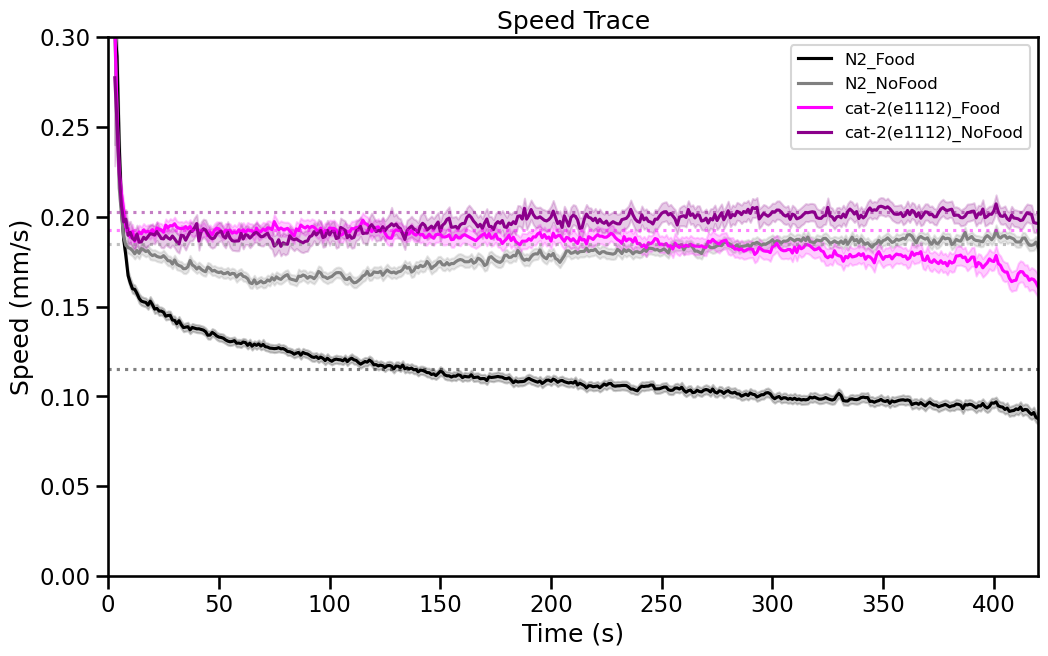

In [11]:
# Setting viewing range for your graph
top = 0.30
bottom = 0
left = 0
right = 420

# Set specifications for graph
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize = (12, 7))
plt.gca().xaxis.grid(False)

# Specify data and colours to be used
ax = sns.lineplot(x = "time_bin",
                  y = "speed",
                  # data = TotalConcatenated,  # <----- uncomment and comment row below if using all data
                  data = TotalN2cat2,
                  hue = 'Strain',
                  palette = ['black',
                             'grey',
                             '#FF00FF',
                             '#8B008B',
                             # 'green',  # <----- uncomment additional colours if analyzing more strains (2 per strain)
                             # 'lightgreen',
                             # 'royalblue',
                             # 'lightblue',
                             # '#FFB5C5',
                             # '#CD6889'
                            ])

# Specify labels
plt.xlabel("Time (s)")
plt.ylabel("Speed (mm/s)")
plt.title("Speed Trace")

# Specify viewing range using variables at top of cell
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)

# Add horizontal lines to visualize mean speed of each strain and condition (comment out if using more than N2 & CB1112)
# If keeping uncommented, may need to adjust indexing to calculate proper speeds
plt.axhline(y = TotalConcatenated_avg_speed['speed'][0], color = 'black', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][1], color = 'grey', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][2], color = '#FF00FF', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][3], color = '#8B008B', linestyle = ':', alpha = 0.5)

# # Add annotations to show mean speed of each strain and condition
# # Same caution as previous step regarding proper speeds
# ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][0], 3)}",
#             xy = (420, TotalConcatenated_avg_speed['speed'][0]),
#             xytext = (420, TotalConcatenated_avg_speed['speed'][0]),
#             color = 'black', size = 14)
# ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][1], 3)}",
#             xy = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
#             xytext = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
#             color = 'grey', size = 14)
# ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][4], 3)}",
#             xy = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
#             xytext = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
#             color = '#FF00FF', size = 14)
# ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][5], 3)}",
#             xy = (420, TotalConcatenated_avg_speed['speed'][5] - 0.005),
#             xytext = (420, TotalConcatenated_avg_speed['speed'][5] - 0.007),
#             color = '#8B008B', size = 14)

# Specify location for legend
ax.legend(loc = 'upper right', fontsize = '12'
          # , labels = ['N2 (Off Food)', 'N2 (On Food)', 'CB1112 (Off Food)', 'CB1112 (On Food)']
         )

# Save figure to current working directory
plt.savefig(f'Speed_Trace_{left}to{right}s.jpg', format = 'jpg', dpi = 450)

plt.show()

# 4 - Generate OffFood/OnFood comparison bar plots

## 4.1 - BSR bar plots (difference of differences and difference of percent change)

### 4.1.1 - First, take data only from the time in the experiment(s) you want to analyze, and find the average speed for each genotype and treatment

In [12]:
# print(TotalConcatenated.head(1))

start = 100  # <----- set the start time of the range
point = 350  # <----- set the end time of your range

# Take data between specified time points
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

# Take mean of all measures for each worm
chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index = False).mean()

# Split `Strain` column into `Genotype` and `Treatment` columns
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)

# Select only the specified columns from previous result (others not important for BSR score)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]

# Take mean speed for each genotype and treatment (should result in 2 rows for each genotype - 1 for each condition)
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index = False).mean()
print(avg_speed)
# avg_speed.to_csv("avg_speed.csv")

                      Strain Treatment           Genotype     speed
0                    N2_Food      Food                 N2  0.116364
1                  N2_NoFood    NoFood                 N2  0.183403
2          cat-2(e1112)_Food      Food       cat-2(e1112)  0.193842
3        cat-2(e1112)_NoFood    NoFood       cat-2(e1112)  0.201408
4        catp-7(tm4438)_Food      Food     catp-7(tm4438)  0.060664
5      catp-7(tm4438)_NoFood    NoFood     catp-7(tm4438)  0.168907
6        catp-7(tm8556)_Food      Food     catp-7(tm8556)  0.067511
7      catp-7(tm8556)_NoFood    NoFood     catp-7(tm8556)  0.152036
8         cpr-4(ok3413)_Food      Food      cpr-4(ok3413)  0.066708
9       cpr-4(ok3413)_NoFood    NoFood      cpr-4(ok3413)  0.114848
10        cpr-5(ok2344)_Food      Food      cpr-5(ok2344)  0.075488
11      cpr-5(ok2344)_NoFood    NoFood      cpr-5(ok2344)  0.137827
12       cpr-6(tm12210)_Food      Food     cpr-6(tm12210)  0.097772
13     cpr-6(tm12210)_NoFood    NoFood     cpr-6

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\4139028439.py:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


### 4.1.2 - Then, calculate the difference in speed between conditions for each genotype (in mm/s), as well as the percent change in speed relative to OffFood speed for each genotype

In [13]:
# ABSOLUTE DIFFERENCE
# Drop `Strain` and `Treatment` columns, group by `Genotype` (without making index based on `Genotype`)
# Then, for each `Genotype`, subtract OnFood from OffFood speed
speed_diff = avg_speed.drop(columns = ["Strain", "Treatment"])
speed_diff = speed_diff.groupby("Genotype", as_index = False).diff(periods = -1).dropna()

# rename difference column to 'speed_diff'
speed_diff.columns = ['speed_diff']

print(speed_diff)

# PERCENT DIFFERENCE
avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)
speed_pct_diff = avg_speed['speed_pct_diff'].dropna()
avg_speed = avg_speed.drop(columns = ['speed_pct_diff'])

print(speed_pct_diff)

    speed_diff
0    -0.067039
2    -0.007566
4    -0.108242
6    -0.084525
8    -0.048140
10   -0.062339
12   -0.092348
14   -0.044468
16   -0.085043
18   -0.061157
20   -0.081213
22   -0.040451
24   -0.050307
26   -0.058395
28   -0.047999
30   -0.067928
32   -0.081459
34   -0.062455
36   -0.056104
38   -0.023649
40   -0.083453
0    -0.576111
2    -0.039033
4    -1.784286
6    -1.252005
8    -0.721657
10   -0.825819
12   -0.944515
14   -1.132741
16   -1.414673
18   -0.837489
20   -0.947525
22   -0.412551
24   -0.704743
26   -0.650692
28   -0.456347
30   -0.758980
32   -1.429474
34   -0.861772
36   -0.442382
38   -0.324030
40   -0.827246
Name: speed_pct_diff, dtype: float64


C:\Users\chris\AppData\Local\Temp\ipykernel_40808\1886152336.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)


### 4.1.3 - Combine the absolute difference and percent difference data

In [14]:
all_diff_measures = pd.concat([speed_diff, speed_pct_diff], axis = 1)
# all_diff_measures = all_diff_measures.rename(columns = {0: 'speed_pct_diff'})

# add `Genotype` labels back to speed difference measures so differences can be identified
all_diff_measures.insert(loc = 0, column = 'Genotype', value = avg_speed['Genotype'].unique())
all_diff_measures.reset_index(drop = True)

,Genotype,speed_diff,speed_pct_diff
0,N2,-0.067039,-0.576111
1,cat-2(e1112),-0.007566,-0.039033
2,catp-7(tm4438),-0.108242,-1.784286
3,catp-7(tm8556),-0.084525,-1.252005
4,cpr-4(ok3413),-0.048140,-0.721657
5,cpr-5(ok2344),-0.062339,-0.825819
6,cpr-6(tm12210),-0.092348,-0.944515
7,cpr-8(ok2956),-0.044468,-1.132741
8,djr-1.1(tm918),-0.085043,-1.414673
9,djr-1.2(tm817),-0.061157,-0.837489


### 4.1.4 - Calculate BSR score using both methods (difference of differences & difference of percent change)

In [15]:
# # find N2 speed differences
# print(all_diff_measures.iloc[0, 1])
# print(all_diff_measures.iloc[0, 2])

# calculate BSR score using difference of differences
all_diff_measures['Score_diff_of_diff'] = all_diff_measures['speed_diff'] - all_diff_measures.iloc[0,1]
all_diff_measures['Score_diff_of_pct_diff'] = all_diff_measures['speed_pct_diff'] - all_diff_measures.iloc[0,2]

print(all_diff_measures)

             Genotype  speed_diff  speed_pct_diff  Score_diff_of_diff  \
0                  N2   -0.067039       -0.576111            0.000000   
2        cat-2(e1112)   -0.007566       -0.039033            0.059472   
4      catp-7(tm4438)   -0.108242       -1.784286           -0.041204   
6      catp-7(tm8556)   -0.084525       -1.252005           -0.017486   
8       cpr-4(ok3413)   -0.048140       -0.721657            0.018899   
10      cpr-5(ok2344)   -0.062339       -0.825819            0.004700   
12     cpr-6(tm12210)   -0.092348       -0.944515           -0.025309   
14      cpr-8(ok2956)   -0.044468       -1.132741            0.022571   
16     djr-1.1(tm918)   -0.085043       -1.414673           -0.018005   
18     djr-1.2(tm817)   -0.061157       -0.837489            0.005882   
20     djr-1.2(tm951)   -0.081213       -0.947525           -0.014174   
22  exp-2(sa26ad1426)   -0.040451       -0.412551            0.026588   
24      kvs-5(tm6152)   -0.050307       -0.704743  

### 4.1.5 - Make separate dataframe for each method of BSR calculation, and sort by ascending BSR score

In [16]:
# DIFFERENCE OF DIFFERENCES
speed_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_diff"]).drop(columns = ['speed_pct_diff',
                                                                                               'Score_diff_of_pct_diff'])
speed_diff_sorted = speed_diff_sorted.reset_index(drop = True)
print(speed_diff_sorted)

# DIFFERENCE OF PERCENT CHANGE
speed_pct_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_pct_diff"]).drop(columns = ['speed_diff',
                                                                                                       'Score_diff_of_diff'])
speed_pct_diff_sorted = speed_pct_diff_sorted.reset_index(drop = True)
print(speed_pct_diff_sorted)

             Genotype  speed_diff  Score_diff_of_diff
0      catp-7(tm4438)   -0.108242           -0.041204
1      cpr-6(tm12210)   -0.092348           -0.025309
2      djr-1.1(tm918)   -0.085043           -0.018005
3      catp-7(tm8556)   -0.084525           -0.017486
4     sipa-1(tm11702)   -0.083453           -0.016415
5       ncs-4(tm4409)   -0.081459           -0.014420
6      djr-1.2(tm951)   -0.081213           -0.014174
7       mbr-1(tm1235)   -0.067928           -0.000890
8                  N2   -0.067039            0.000000
9       ncs-7(tm4648)   -0.062455            0.004584
10      cpr-5(ok2344)   -0.062339            0.004700
11     djr-1.2(tm817)   -0.061157            0.005882
12       lfe-2(sy326)   -0.058395            0.008644
13      ncs-7(tm5037)   -0.056104            0.010934
14      kvs-5(tm6152)   -0.050307            0.016732
15      cpr-4(ok3413)   -0.048140            0.018899
16      mbr-1(qa5901)   -0.047999            0.019040
17      cpr-8(ok2956)   -0.0

In [17]:
# NOT SURE WHAT THE USE OF THIS IS - BEN

# avg_speed["new"] = range(1, len(avg_speed) + 1)
# avg_speed.loc[avg_speed.index == 4, 'new'] = 0
# avg_speed.loc[avg_speed.index == 4, 'new'] = 0
# print(avg_speed)
# # avg_speed.sort_values("new").drop('new', axis=1)

## 4.1.6 - Making the bar plot (difference of differences)

<Figure size 640x480 with 0 Axes>

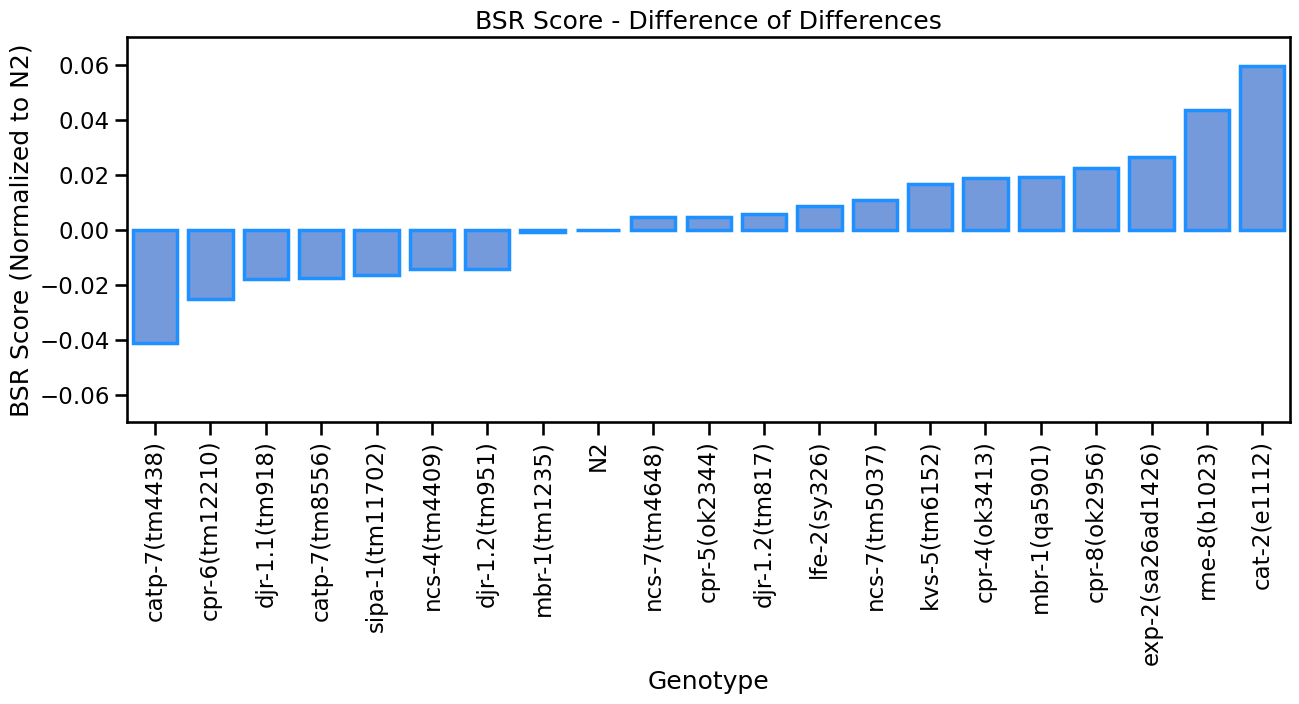

In [18]:
Title = "BSR Score - Difference of Differences"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_diff', 
             data = speed_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.ylim(top = 0.07)
plt.ylim(bottom = -0.07)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.1.7 - Making the bar plot (difference of percent change)

<Figure size 640x480 with 0 Axes>

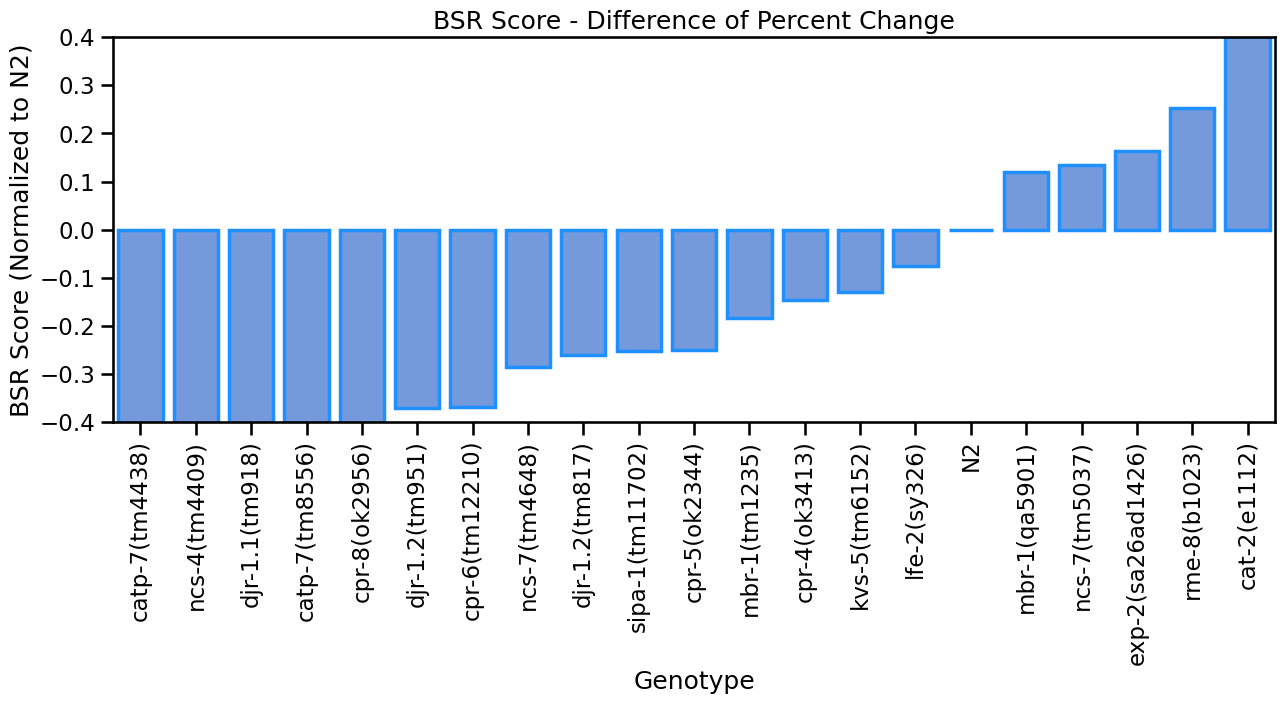

In [19]:
Title = "BSR Score - Difference of Percent Change"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_pct_diff', 
             data = speed_pct_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.4)
plt.ylim(bottom = -0.4)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.2 - Generic differences of differences script (for any behavioural phenotype)

Very little commentary here, as code is similar to that for BSR score apart from inputting behavioural phenotype of interest

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\530234562.py:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


             Genotype      bias     Score
18     djr-1.2(tm817) -0.181049 -0.374542
14      cpr-8(ok2956) -0.170895 -0.364387
32      ncs-4(tm4409) -0.139121 -0.332613
6      catp-7(tm8556) -0.089248 -0.282741
4      catp-7(tm4438) -0.066364 -0.259857
24      kvs-5(tm6152) -0.051179 -0.244671
16     djr-1.1(tm918) -0.028487 -0.221980
20     djr-1.2(tm951) -0.022480 -0.215973
34      ncs-7(tm4648) -0.015906 -0.209399
8       cpr-4(ok3413)  0.015396 -0.178097
30      mbr-1(tm1235)  0.042382 -0.151111
28      mbr-1(qa5901)  0.049720 -0.143772
10      cpr-5(ok2344)  0.071248 -0.122245
40    sipa-1(tm11702)  0.092350 -0.101143
12     cpr-6(tm12210)  0.104650 -0.088842
22  exp-2(sa26ad1426)  0.166994 -0.026499
26       lfe-2(sy326)  0.168943 -0.024550
38       rme-8(b1023)  0.171515 -0.021978
2        cat-2(e1112)  0.186003 -0.007489
36      ncs-7(tm5037)  0.188877 -0.004615
0                  N2  0.193492  0.000000


<Figure size 640x480 with 0 Axes>

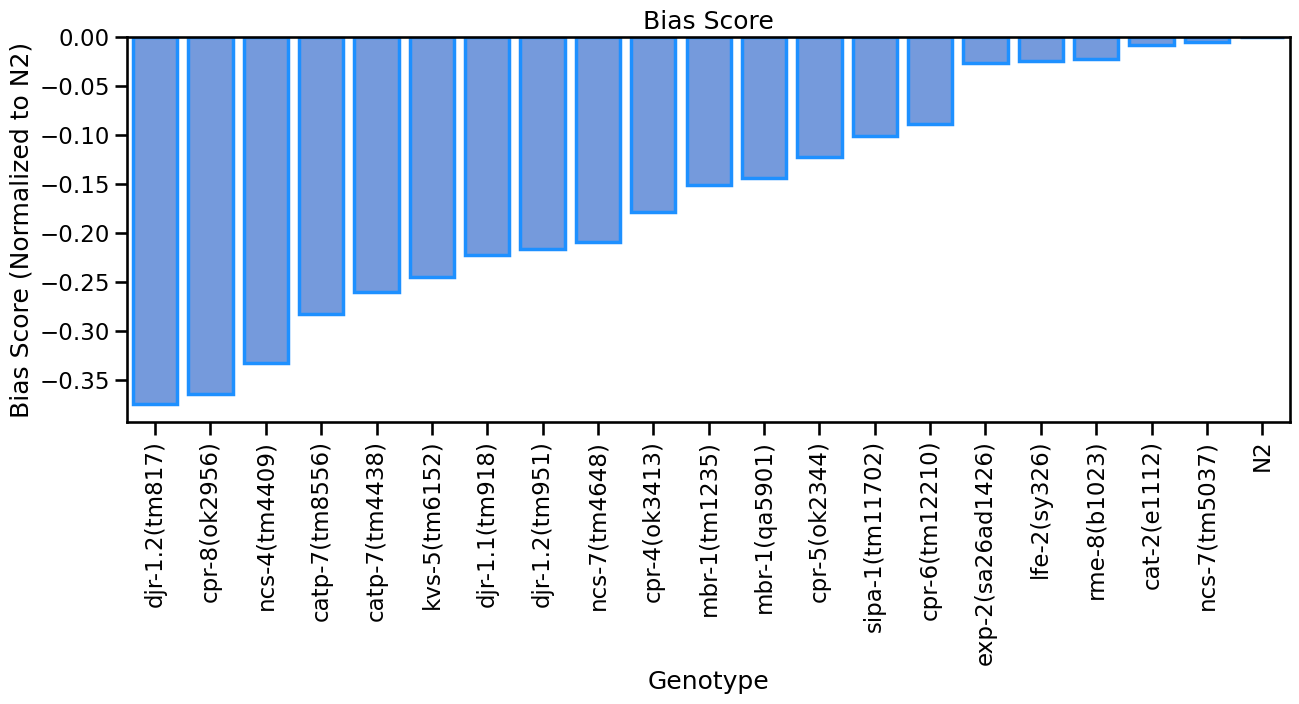

In [20]:
parameter = 'bias'  # <----- INPUT PHENOTYPE OF INTEREST HERE

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range

chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_parameter)

# avg_parameter.to_csv("avg_parameter.csv")

parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index = False).diff(periods = -1).dropna()
parameter_diff.insert(loc = 0, column='Genotype', value = avg_parameter['Genotype'].unique())
parameter_diff.reset_index(drop = True)
# print(parameter_diff)
# print(parameter_diff.iloc[0,1])
parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
parameter_diff = parameter_diff.sort_values(by = ["Score"])
print(parameter_diff)

#################

# print(parameter_diff.iloc[0,1])

#################

# AGAIN, NOT SURE WHAT THIS IS FOR - BEN
# avg_parameter["new"] = range(1,len(avg_parameter) + 1)
# avg_parameter.loc[avg_parameter.index == 4, 'new'] = 0
# avg_parameter.loc[avg_parameter.index == 4, 'new'] = 0
# print(avg_parameter)
# # avg_parameter.sort_values("new").drop('new', axis=1)

#################

Title = f"{parameter.capitalize()} Score"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = "Genotype",
                 y = 'Score',
                 data = parameter_diff,  # <--------------- Input Here -------------
                 color = 'CornflowerBlue',
                 edgecolor = "DodgerBlue",
                 linewidth = 2.5,
                 # seed=5,
                 # ci = 95, # 'sd' for SD, '68' for SEM
                 # palette = ['grey',
                 #            'black'
                 #           ]
                )

plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel(f"{parameter.capitalize()} Score (Normalized to N2)")

# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')

plt.show()

# 5 - Phenotype Heatmap

## 5.1 - Calculate difference of differences scores for all behavioural phenotypes

In [21]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
# print(all_strains)

def differences_of_differences(start, point, df):
    chunkeddata0 = df[df["time"] >= start]
    chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
    chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
    chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
    all_scores = all_strains
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
        avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
        # print(avg_parameter)

        # avg_parameter.to_csv("avg_parameter.csv")

        parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        parameter_diff = parameter_diff.drop(columns = [parameter])
        parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        parameter_diff = parameter_diff.reset_index(drop = True)
        # print(parameter_diff)
        all_scores = all_scores.join(parameter_diff.iloc[:,1])
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

differences_of_differences(100, 400, TotalConcatenated)

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\2023198025.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


,speed,angularspeed,bias,curve,crab,kink
Genotype,,,,,,
N2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cat-2(e1112),0.059778,4.363054,-0.007489,0.742716,0.006790,-0.583751
catp-7(tm4438),-0.039944,-0.111327,-0.259857,-2.658010,0.000512,-0.821573
catp-7(tm8556),-0.018671,2.048192,-0.282741,-0.450378,0.002777,4.476629
cpr-4(ok3413),0.018844,1.207186,-0.178097,0.259961,0.002998,2.366736
cpr-5(ok2344),0.006146,-0.396064,-0.122245,0.402449,0.000646,4.167367
cpr-6(tm12210),-0.024220,0.034449,-0.088842,-0.680615,-0.000650,0.332341
cpr-8(ok2956),0.023637,3.049541,-0.364387,-1.138160,0.005281,-0.478089
djr-1.1(tm918),-0.016402,1.155175,-0.221980,-0.610133,0.001607,3.326551


### 5.1.1 - Use function defined above to store difference of difference dataframe in a new variable

In [22]:
PD_gene_behavioural_scores = differences_of_differences(100, 400, TotalConcatenated)
PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index()
print(PD_gene_behavioural_scores)

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\2023198025.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


                      speed  angularspeed      bias     curve      crab  \
Genotype                                                                  
N2                 0.000000      0.000000  0.000000  0.000000  0.000000   
cat-2(e1112)       0.059778      4.363054 -0.007489  0.742716  0.006790   
catp-7(tm4438)    -0.039944     -0.111327 -0.259857 -2.658010  0.000512   
catp-7(tm8556)    -0.018671      2.048192 -0.282741 -0.450378  0.002777   
cpr-4(ok3413)      0.018844      1.207186 -0.178097  0.259961  0.002998   
cpr-5(ok2344)      0.006146     -0.396064 -0.122245  0.402449  0.000646   
cpr-6(tm12210)    -0.024220      0.034449 -0.088842 -0.680615 -0.000650   
cpr-8(ok2956)      0.023637      3.049541 -0.364387 -1.138160  0.005281   
djr-1.1(tm918)    -0.016402      1.155175 -0.221980 -0.610133  0.001607   
djr-1.2(tm817)     0.005706      4.670355 -0.374542  1.572700  0.005828   
djr-1.2(tm951)    -0.014766      3.830166 -0.215973  0.591095  0.004350   
exp-2(sa26ad1426)  0.0288

### 5.1.2 - Standardize and normalize the difference of difference scores

In [23]:
PD_gene_behavioural_scores_standardize = (PD_gene_behavioural_scores - PD_gene_behavioural_scores.mean())/PD_gene_behavioural_scores.std()
print(PD_gene_behavioural_scores_standardize)

PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_standardize - PD_gene_behavioural_scores_standardize[PD_gene_behavioural_scores_standardize.index == 'N2'].squeeze()
PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_normalize.drop(index = 'N2')
print(PD_gene_behavioural_scores_normalize)

                      speed  angularspeed      bias     curve      crab  \
Genotype                                                                  
N2                -0.208566     -0.830507  1.317095  0.266909 -1.032712   
cat-2(e1112)       2.309009      1.591084  1.255745  0.792984  1.910698   
catp-7(tm4438)    -1.890831     -0.892295 -0.811549 -1.615793 -0.810665   
catp-7(tm8556)    -0.994875      0.306285 -0.999007 -0.052100  0.171273   
cpr-4(ok3413)      0.585031     -0.160492 -0.141803  0.451042  0.266787   
cpr-5(ok2344)      0.050279     -1.050331  0.315715  0.551968 -0.752697   
cpr-6(tm12210)    -1.228604     -0.811387  0.589334 -0.215179 -1.314665   
cpr-8(ok2956)      0.786921      0.862056 -1.667824 -0.539264  1.256335   
djr-1.1(tm918)    -0.899335     -0.189359 -0.501278 -0.165256 -0.335912   
djr-1.2(tm817)     0.031754      1.761643 -1.751005  1.380871  1.493802   
djr-1.2(tm951)    -0.830432      1.295319 -0.452071  0.685588  0.852934   
exp-2(sa26ad1426)  1.0075

## 5.2 - Calculate, standardize, and normalize t-scores for all baseline behavioural and morphological phenotypes

### 5.2.1 - Read in and tidy data (same data as used previously)

In [24]:
# PD_baseline = pd.read_csv('baseline_output.csv')
PD_baseline = pd.concat(dfs_to_append, ignore_index=True)
PD_baseline = PD_baseline.iloc[:, 1:]
PD_baseline = PD_baseline.drop(columns=["x", "y"])
PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)

print(PD_baseline.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_40808\1017856684.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)


   time_bin  worm      time     speed  angularspeed  pathlength       kink  \
0       4.0   381  3.875333  0.199433      5.233333    0.030333  34.000000   
1       4.0   424  3.959000  0.215800      3.900000    0.017000  46.300000   
2       4.0  1230  3.646400  0.282660     10.040000    0.097600  34.520000   
3       4.0  1298  3.526000  0.365729     17.428571    0.170429  36.857143   
4       5.0   309  4.903500  0.265500     22.950000    0.035500  15.250000   

   bias      curve  dir      crab   length   midline     width  morphwidth  \
0   1.0  39.433333  0.0  0.015700  0.87930  0.977933  0.165600    0.097033   
1   1.0  35.300000  0.0  0.042900  0.81810  0.962800  0.272700    0.125000   
2   1.0  30.720000  0.0  0.036280  0.76248  1.025460  0.197100    0.094320   
3   1.0  34.785714  0.0  0.032114  0.74250  0.999971  0.211757    0.090957   
4   1.0  28.300000  0.0  0.025750  0.94095  1.039950  0.191700    0.087250   

       area   Strain Genotype Treatment  
0  0.091854  N2_Food

### 5.2.2 - Subset the final 100 seconds of the experiment

In [25]:
PD_baseline_last100 = PD_baseline[((PD_baseline.time <= 420) & (PD_baseline.time >= 320))]
PD_baseline_last100 = PD_baseline_last100.reset_index()
PD_baseline_last100 = PD_baseline_last100.dropna()
print(PD_baseline_last100)

           index  time_bin  worm        time     speed  angularspeed  \
0          79210     321.0     6  320.499818  0.043955      7.790909   
1          79211     321.0    10  320.499818  0.008827      0.572727   
2          79212     321.0    13  320.499818  0.084627      3.727273   
3          79213     321.0    14  320.453300  0.077550      1.030000   
4          79214     321.0    18  320.499818  0.017845      0.936364   
...          ...       ...   ...         ...       ...           ...   
1303334  5556727     420.0  1689  419.495563  0.288006     19.912500   
1303335  5556728     420.0  1690  419.495563  0.236344      4.975000   
1303336  5556729     420.0  1707  419.495563  0.175644      7.106250   
1303337  5556730     420.0  1712  419.495563  0.279850      9.793750   
1303338  5556731     420.0  1718  419.495563  0.291425      8.712500   

         pathlength        kink      bias      curve       dir      crab  \
0          5.572364   95.127273  1.000000  31.590909  0.006

### 5.2.3 - Generate list of all strains in data set

In [26]:
list = PD_baseline_last100["Genotype"].unique()
print(list)

['N2' 'cat-2(e1112)' 'cpr-4(ok3413)' 'cpr-5(ok2344)' 'lfe-2(sy326)'
 'sipa-1(tm11702)' 'djr-1.2(tm817)' 'djr-1.2(tm951)' 'cpr-6(tm12210)'
 'djr-1.1(tm918)' 'exp-2(sa26ad1426)' 'kvs-5(tm6152)' 'rme-8(b1023)'
 'cpr-8(ok2956)' 'ncs-4(tm4409)' 'catp-7(tm4438)' 'catp-7(tm8556)'
 'mbr-1(qa5901)' 'mbr-1(tm1235)' 'ncs-7(tm4648)' 'ncs-7(tm5037)']


### 5.2.4 - Separate OffFood and OnFood data for comparison of behaviour within conditions

In [27]:
# PD_baseline_last100_OffFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood')
# PD_baseline_last100_OffFood = PD_baseline_last100_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype'})
PD_baseline_last100_OffFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "NoFood"].dropna().add_suffix('_OffFood')
PD_baseline_last100_OffFood = PD_baseline_last100_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype'})


# PD_baseline_last100_OnFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood')
# PD_baseline_last100_OnFood = PD_baseline_last100_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype'})
PD_baseline_last100_OnFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "Food"].dropna().add_suffix('_OnFood')
PD_baseline_last100_OnFood = PD_baseline_last100_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype'})
print(PD_baseline_last100_OffFood)
print(PD_baseline_last100_OnFood)

         index_OffFood  time_bin_OffFood  worm_OffFood  time_OffFood  \
20792           158998             321.0             3    320.478556   
20793           158999             321.0             9    320.478556   
20794           159000             321.0            22    320.478556   
20795           159001             321.0            36    320.068500   
20796           159002             321.0            47    320.478556   
...                ...               ...           ...           ...   
1303334        5556727             420.0          1689    419.495563   
1303335        5556728             420.0          1690    419.495563   
1303336        5556729             420.0          1707    419.495563   
1303337        5556730             420.0          1712    419.495563   
1303338        5556731             420.0          1718    419.495563   

         speed_OffFood  angularspeed_OffFood  pathlength_OffFood  \
20792         0.168122             13.988889           -2.489667   

### 5.2.5 - Generate empty dataframes for each measure of phenotype (scores will be added to these)

In [28]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Genotype", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Genotype", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Genotype", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Genotype", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Genotype", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Genotype", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Genotype", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Genotype", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Genotype", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Genotype", "kink_OnFood"])

print(PD_gene_baseline_midline_T)

Empty DataFrame
Columns: [Genotype, midline]
Index: []


### 5.2.6 - Define t-test function

In [29]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], equal_var = False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

### 5.2.7 - Use `TTest_Gene()` function to generate t-scores for each genotype, measure of phenotype, and condition

In [30]:
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_gene_baseline_midline_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_gene_baseline_morphwidth_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_gene_baseline_area_T)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_kink_T_OnFood)

             Genotype      length
0                  N2    0.000000
1        cat-2(e1112)    4.018379
2       cpr-4(ok3413) -199.932249
3       cpr-5(ok2344) -309.218261
4        lfe-2(sy326) -183.668474
5     sipa-1(tm11702) -125.616502
6      djr-1.2(tm817)  -79.958757
7      djr-1.2(tm951)  -49.959759
8      cpr-6(tm12210)  -22.326421
9      djr-1.1(tm918) -229.277587
10  exp-2(sa26ad1426)  -79.785889
11      kvs-5(tm6152)  -77.781618
12       rme-8(b1023) -256.332499
13      cpr-8(ok2956) -210.825416
14      ncs-4(tm4409)   51.098405
15     catp-7(tm4438)  -12.598566
16     catp-7(tm8556)  -21.042546
17      mbr-1(qa5901)   74.925019
18      mbr-1(tm1235)  -11.594430
19      ncs-7(tm4648)  112.880551
20      ncs-7(tm5037)   44.039541
             Genotype     midline
0                  N2    0.000000
1        cat-2(e1112)   48.217716
2       cpr-4(ok3413) -274.759137
3       cpr-5(ok2344) -401.396099
4        lfe-2(sy326) -314.775145
5     sipa-1(tm11702) -213.605644
6      djr-1.2

             Genotype  speed_OnFood
0                  N2      0.000000
1        cat-2(e1112)    270.435319
2       cpr-4(ok3413)   -149.412080
3       cpr-5(ok2344)   -130.366997
4        lfe-2(sy326)   -110.421404
5     sipa-1(tm11702)    -79.288131
6      djr-1.2(tm817)   -143.382006
7      djr-1.2(tm951)   -141.961758
8      cpr-6(tm12210)    -98.367305
9      djr-1.1(tm918)   -209.160971
10  exp-2(sa26ad1426)    -74.525802
11      kvs-5(tm6152)   -203.823429
12       rme-8(b1023)    -83.678502
13      cpr-8(ok2956)   -141.534036
14      ncs-4(tm4409)   -276.360759
15     catp-7(tm4438)   -232.959966
16     catp-7(tm8556)   -152.743447
17      mbr-1(qa5901)    -13.624234
18      mbr-1(tm1235)    -92.841352
19      ncs-7(tm4648)   -167.416106
20      ncs-7(tm5037)      6.551295
             Genotype  angularspeed_OnFood
0                  N2             0.000000
1        cat-2(e1112)           160.278097
2       cpr-4(ok3413)           -23.297502
3       cpr-5(ok2344)            12.

### 5.2.8 - Combine all dataframes generated in step 5.2.7

In [31]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_midline_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_morphwidth_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OffFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OnFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.set_index("Genotype")
print(PD_gene_baseline_Tstats)

                       length     midline       width  morphwidth        area  \
Genotype                                                                        
N2                   0.000000    0.000000    0.000000    0.000000    0.000000   
cat-2(e1112)         4.018379   48.217716   74.673143   55.105601   71.456792   
cpr-4(ok3413)     -199.932249 -274.759137  -66.733672 -109.544634 -317.314007   
cpr-5(ok2344)     -309.218261 -401.396099  -39.438782  -92.851988 -409.169253   
lfe-2(sy326)      -183.668474 -314.775145 -132.147715  -63.126541 -270.298268   
sipa-1(tm11702)   -125.616502 -213.605644  -80.811658  -23.325413 -149.435940   
djr-1.2(tm817)     -79.958757 -190.502256 -132.909327  -85.352404 -154.724818   
djr-1.2(tm951)     -49.959759 -217.696690 -186.767100 -118.823928 -214.274307   
cpr-6(tm12210)     -22.326421  -92.720153  -64.897031  -52.143140  -92.311651   
djr-1.1(tm918)    -229.277587 -390.424489 -195.649814 -218.421054 -438.020585   
exp-2(sa26ad1426)  -79.78588

### 5.2.9 - Standardize and normalize t-scores

In [ ]:
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
print('-'*45)
print(PD_gene_baseline_Tstats_normalize)
PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2')
print('-'*45)
print(PD_gene_baseline_Tstats_normalize)


## 5.3 - Generate phenotype heatmap with all measures

### 5.3.1A - Combine dataframe containing morphology and behaviour t-scores with dataframe containing difference of difference scores

In [ ]:
full_heatmap_normalized = PD_gene_baseline_Tstats_normalize.join(PD_gene_behavioural_scores_normalize)

# Save the merged DataFrame as a CSV file to a specific directory
full_heatmap_normalized.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\phenotype_heatmap_normalized_dataframe.csv', index=True)

print(full_heatmap_normalized)

### 5.3.1B - Combine dataframe containing morphology and behaviour raw scores (t-statistics) with dataframe containing difference of difference scores

In [35]:
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.drop(index = 'N2')
PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index()

full_heatmap = PD_gene_baseline_Tstats.join(PD_gene_behavioural_scores)

# Save the merged DataFrame as a CSV file to a specific directory
full_heatmap.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\phenotype_heatmap_dataframe.csv', index=True)

print(full_heatmap.shape)
print(full_heatmap)

(20, 23)
                       length     midline       width  morphwidth        area  \
Genotype                                                                        
cat-2(e1112)         4.018379   48.217716   74.673143   55.105601   71.456792   
catp-7(tm4438)     -12.598566  -81.635919  -69.624648  -88.538870 -131.854926   
catp-7(tm8556)     -21.042546  -75.427152  -74.520491 -123.457139 -151.016213   
cpr-4(ok3413)     -199.932249 -274.759137  -66.733672 -109.544634 -317.314007   
cpr-5(ok2344)     -309.218261 -401.396099  -39.438782  -92.851988 -409.169253   
cpr-6(tm12210)     -22.326421  -92.720153  -64.897031  -52.143140  -92.311651   
cpr-8(ok2956)     -210.825416 -355.617687 -158.365894 -174.253694 -423.489676   
djr-1.1(tm918)    -229.277587 -390.424489 -195.649814 -218.421054 -438.020585   
djr-1.2(tm817)     -79.958757 -190.502256 -132.909327  -85.352404 -154.724818   
djr-1.2(tm951)     -49.959759 -217.696690 -186.767100 -118.823928 -214.274307   
exp-2(sa26ad1426)  

### 5.3.2 - Produce and save heatmap

#### 5.3.2A - Heatmap of raw data

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = full_heatmap, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 150, # full_heatmap max = 236.046
                 vmin = -150, # full_heatmap min = -446.724
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 24)
ax.set_xlabel('Phenotype', fontsize = 24)
ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('Complete_GENE_heatmap_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

#### Heatmap of normalized t-score data

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = full_heatmap_normalized, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 24)
ax.set_xlabel('Phenotype', fontsize = 24)
ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('Complete_GENE_heatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

# Everything below not intended for large scale analysis of many strains, and include bugs that would need to be fixed (commented out so notebook can be run start to finish)

# Graphing Bar Graphs

## Speed Barplots Comparison

In [ ]:
# # Valid Measurement inputs(change var)
# # 1:'speed', <---
# # 2: "x",
# # 3: "y",
# # 4: "angularspeed", <-----
# # 5: "pathlength",
# # 6: "kink",  <---
# # 7: "bias", <----
# # 8: "curve", <---
# # 9: "dir",<----
# # 10: "crab",<----
# # 11: "length",<---
# # 12: "midline",<----
# # 13: "width",<----
# # 14: "morphwidth",<----
# # 15: "area"<----

# start = 200
# point = 400
# var = "area"
# chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
# chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
# chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
# chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

# Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
# sns.set_context("talk")
# plt.figure(linewidth = 2.5)
# plt.figure(figsize=(15, 3))
# plt.gca().xaxis.grid(False)
# ax = sns.barplot(x="Genotype", 
#              y = var, 
#              data = chunkeddata_mean, #<--------------- Input Here -------------
#              hue = 'Treatment',
#              edgecolor="black",
#              linewidth = 2.5,
# #              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
#                 )
# plt.xlabel("Strain and Condition")
# # plt.ylabel("Average Speed (mm/s)")
# plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
# plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

## Bias Barplots Comparison

In [ ]:
# point = 420
# var = "bias"
# chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
# chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

# Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
# sns.set_context("talk")
# plt.figure(linewidth = 2.5)
# plt.figure(figsize=(15, 5))
# plt.gca().xaxis.grid(False)
# ax = sns.barplot(x="Genotype", 
#              y = var, 
#              data = chunkeddata, #<--------------- Input Here -------------
#              hue = 'Treatment',
#              edgecolor="black",
#              linewidth = 2.5,
#              ci = None,
#              palette = ['black',
#                         'grey'
#                        ]
#                 )
# plt.xlabel("Strain and Condition")
# # plt.ylabel("Average Speed (mm/s)")
# plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# # plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
# plt.show()